<a href="https://colab.research.google.com/github/DataGF/machine-learning/blob/master/lifeSatisfactionVsGDPPerCapita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training and running two models using Scikit-Learn

###Using Linear and KNeighbors Regression to make predictions

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gdp_per_capita.csv to gdp_per_capita.csv
Saving oecd_bli_2015.csv to oecd_bli_2015.csv


In [ ]:
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
encoding='latin1', na_values="n/a")

In [ ]:
# Function prepare country stats
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(
        index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
 
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

###Note: we removed the indexes for Brazil, Mexico, Chile, Czech Republic, Norway, Switzerland and Luxembourg. Why do you think we did that?

These are countries that do not show standard behavior, that is, the higher the GDP per capita, the higher the life satisfaction index. Both Brazil, Mexico, Chile and the Czech Republic, despite having a GDP per capita below USD 20,000.00, the satisfaction rate is very close to Norway, Switzerland and Luxembourg which have GDP per capita above USD 70,000.00.


Using a nonrepresentative training cause sampling noise. Even a very large data samples can be nonrepresentative if the sampling method is not good, that is known as sampling bias.

In [ ]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

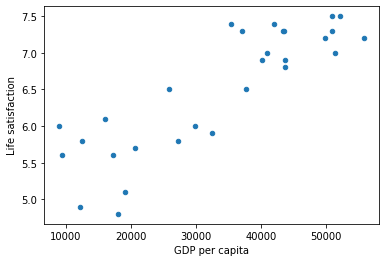

In [ ]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [ ]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Train the model
model.fit(X, y)
model2.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
# Make a life satisfaction prediction for Cyprus
X_new = [[22587]] # Cyprus's GDP per capita
print("The life satisfaction prediction for Cyprus using Linear Regression model is: ", float(model.predict(X_new)), "\n")
print("The life satisfaction prediction for Cyprus using KNeighbors Regression model is: ", float(model2.predict(X_new)), "\n")

The life satisfaction prediction for Cyprus using Linear Regression model is:  5.962423376619663 

The life satisfaction prediction for Cyprus using KNeighbors Regression model is:  5.766666666666666 



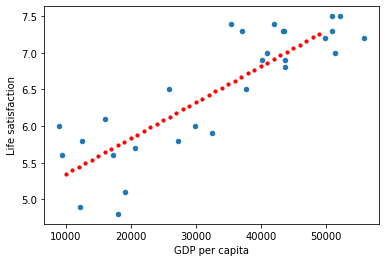

In [ ]:
# Visualize life satisfaction versus GDP per capita with Linear Regression Model prediction
model_lr = sklearn.linear_model.LinearRegression()
model_lr.fit(X, y)
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
for x in range(10, 50):
  plot_x = 1000 * x
  plot_y = float(model_lr.predict([[plot_x]]))
  plt.scatter(plot_x, plot_y, s=10, color='r')
plt.show()

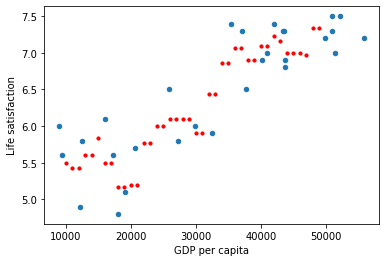

In [ ]:
# Visualize life satisfaction versus GDP per capita with KNeighbors Regression Model prediction
model_knr = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model_knr.fit(X, y)
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
for x in range(10, 50):
  plot_x = 1000 * x
  plot_y = float(model_knr.predict([[plot_x]]))
  plt.scatter(plot_x, plot_y, s=10, color='r')
plt.show()